In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/Dockeree/Doceree-HCP_Train.csv",encoding = "ISO-8859-1")
print(len(df))
df.index=df.ID

113937


In [ ]:
# Importing the dataset
df_test = pd.read_csv("/content/drive/MyDrive/Dockeree/Doceree-HCP_Test.csv")
df_test.index=df_test.ID
len(df_test)

28493

### EDA


In [ ]:
df['TAXONOMY'].value_counts()

2084P0800X    7930
2084N0400X    6621
207Q00000X    3997
207R00000X    3190
208000000X     837
              ... 
163WC0400X       1
246QM0706X       1
1835N1003X       1
207RI0008X       1
207XX0801X       1
Name: TAXONOMY, Length: 207, dtype: int64

In [ ]:
df['TAXONOMY'].value_counts().sum()

32313

In [ ]:
df['TAXONOMY'].isna().sum()

81624

In [ ]:
df['PLATFORMTYPE'].unique()

array(['Online Medical Journal', 'Online Learning Portal',
       'Medical News Platform', 'Electronic Health Record',
       'Tele-medicine Platform'], dtype=object)

<Axes: >

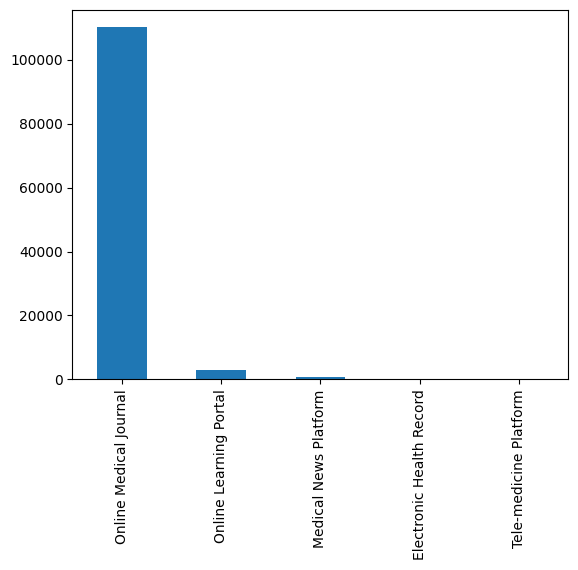

In [ ]:
df['PLATFORMTYPE'].value_counts().plot(kind="bar")
#bar_graph('PLATFORMTYPE')

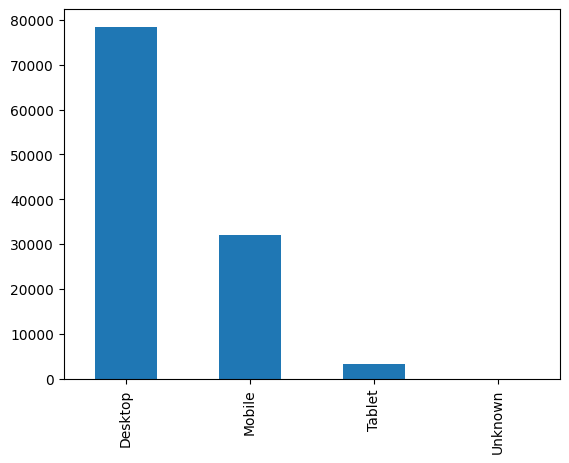

In [ ]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")
bar_graph('DEVICETYPE')

In [ ]:
# Preprocess the text data
sentences = df['KEYWORDS'].apply(lambda x: x.split("|"))
sentences

ID
1001      [General, Endocrine, False, Medicine, Surgery,...
1002      [Bone Marrow, Radiography, Chronic, Oncology, ...
1003      [General, Endocrine, False, Medicine, Surgery,...
1004      [Dental, Total, Clinical, Pharmacology, Physic...
1005      [Critical Care, Emergency Medicine, General Pr...
                                ...                        
114933    [Cardiovascular, Clinical, False, Male, Oncolo...
114934    [Asthma, Arthritis, General, Clinical, Diagnos...
114935    [Rehabilitation, Transplantation, Clinical, Pr...
114936    [pain, disease, autoimmune, multiple sclerosis...
114937    [Genetic, Large, Autoimmune, Health, False, Ab...
Name: KEYWORDS, Length: 113937, dtype: object

In [ ]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')
# from wordcloud import WordCloud

# stop_words = set(stopwords.words('english'))

# all_words = list([a for b in sentences.tolist() for a in b])
# all_words_str = ' '.join(all_words)

# def plot_cloud(wordcloud):
#     plt.figure(figsize=(10, 10))
#     plt.imshow(wordcloud)
#     plt.axis("off");

# wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
#                       colormap='viridis', collocations=False).generate(all_words_str)
# plot_cloud(wordcloud)

In [ ]:

# import matplotlib.pyplot as plt

# stop_words = set(stopwords.words('english'))

# # Filter the sentences based on IS_HCP=1 condition
# hcp_sentences = sentences[df['IS_HCP'] == 1]

# # Concatenate the sentences into a single string
# all_words = list([a for b in hcp_sentences.tolist() for a in b])
# all_words_str = ' '.join(all_words)

# def plot_cloud(wordcloud):
#     plt.figure(figsize=(20, 10))
#     plt.imshow(wordcloud)
#     plt.axis("off")

# wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black',
#                       colormap='viridis', collocations=False).generate(all_words_str)
# plot_cloud(wordcloud)


In [ ]:
# stop_words = set(stopwords.words('english'))

# # Filter the sentences based on IS_HCP=1 condition
# hcp_sentences = sentences[df['IS_HCP'] == 0]

# # Concatenate the sentences into a single string
# all_words = list([a for b in hcp_sentences.tolist() for a in b])
# all_words_str = ' '.join(all_words)

# def plot_cloud(wordcloud):
#     plt.figure(figsize=(20, 10))
#     plt.imshow(wordcloud)
#     plt.axis("off")

# wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black',
#                       colormap='viridis', collocations=False).generate(all_words_str)
# plot_cloud(wordcloud)

In [ ]:
df['USERZIPCODE'].fillna(df["USERZIPCODE"].mode()[0],inplace=True)
df['USERCITY'].fillna("UNKNOWN",inplace=True)

df_test['USERZIPCODE'].fillna(df["USERZIPCODE"].mode()[0],inplace=True)
df_test['USERCITY'].fillna("UNKNOWN",inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 1001 to 114937
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  object 
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  object 
 4   USERPLATFORMUID  113933 non-null  object 
 5   USERCITY         113937 non-null  object 
 6   USERZIPCODE      113937 non-null  float64
 7   USERAGENT        113935 non-null  object 
 8   PLATFORMTYPE     113937 non-null  object 
 9   CHANNELTYPE      113937 non-null  object 
 10  URL              113937 non-null  object 
 11  KEYWORDS         113937 non-null  object 
 12  TAXONOMY         32313 non-null   object 
 13  IS_HCP           113936 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 13.0+ MB


In [ ]:
df = df.dropna(subset=['IS_HCP'])
df["TAXONOMY"] = df["TAXONOMY"].notnull().astype("int")

In [ ]:
df['IS_HCP'].value_counts()

0.0    79756
1.0    34180
Name: IS_HCP, dtype: int64

In [ ]:
x = df.iloc[:,:-2]
print(len(df))
x = pd.concat([x, df_test],axis=0)
print(len(df),len(x))
x

113936
113936 142429


,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
ID,,,,,,,,,,,,
1001,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...
1002,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...
1003,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...
1004,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,UNKNOWN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...
1005,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...
...,...,...,...,...,...,...,...,...,...,...,...,...
143989,143989,Desktop,2,69.202.233.241,78ce4bbe-3885-4c14-b945-a0ea1e4574f4,Brooklyn,11215.0,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/news/...,Transplantation|Psychiatry|Heart Failure|Angio...
143990,143990,Desktop,7,75.4.190.65,a53799e1-b279-40cf-b467-11b4d659e325,Miami,33178.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cureus.com/publish/articles/144818...,small|hospitals|nephrology|emergency medicine|...
143991,143991,Desktop,7,137.52.180.45,acc732a8-2ee9-4e2c-9933-70e34db48101,Fort Lauderdale,33314.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/registrations/continue?...,small|hospitals|nephrology|emergency medicine|...


In [ ]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
label_encoder=LabelEncoder()
x['DEVICETYPE']= label_encoder.fit_transform(x['DEVICETYPE'])
x['PLATFORMTYPE']= label_encoder.fit_transform(x['PLATFORMTYPE'])
x['USERAGENT']= label_encoder.fit_transform(x['USERAGENT'])
x['CHANNELTYPE']= label_encoder.fit_transform(x['CHANNELTYPE'])
x
x['DEVICETYPE']= label_encoder.fit_transform(x['DEVICETYPE'])
x['URL']= label_encoder.fit_transform(x['URL'])
x['KEYWORDS']= label_encoder.fit_transform(x['KEYWORDS'])
x['USERCITY']= label_encoder.fit_transform(x['USERCITY'])
x['BIDREQUESTIP']= label_encoder.fit_transform(x['BIDREQUESTIP'])

x['BIDREQUESTIP']= label_encoder.fit_transform(x['BIDREQUESTIP'])
x['USERPLATFORMUID']= label_encoder.fit_transform(x['USERPLATFORMUID'])

# x.drop("DEVICETYPE",inplace=True,axis=1)
# x.drop("BIDREQUESTIP",inplace=True,axis=1)
# x.drop("USERPLATFORMUID",inplace=True,axis=1)
# x.drop("URL",inplace=True,axis=1)
# x.drop("USERZIPCODE",inplace=True,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_TEST = x.iloc[113936:]

x = x.iloc[:113936]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

x['USERZIPCODE'].fillna(X_train.USERZIPCODE.mode()[0], inplace=True)
x

,ID,DEVICETYPE,PLATFORM_ID,USERCITY,USERAGENT,PLATFORMTYPE,CHANNELTYPE,KEYWORDS
ID,,,,,,,,
1001,1001,0,2,3276,3100,3,0,474
1002,1002,0,2,132,2913,3,0,111
1003,1003,0,2,2783,2913,3,0,474
1004,1004,0,3,4124,3191,3,0,282
1005,1005,1,7,1821,4371,3,0,266
...,...,...,...,...,...,...,...,...
114933,114933,0,2,3163,2828,3,0,154
114934,114934,0,2,4161,3265,3,0,69
114935,114935,0,7,4124,2891,3,0,949


### Logistic Regression

In [ ]:
# # Train a logistic regression model
# l_model = LogisticRegression()
# l_model.fit(X_train, y_train)

# # Make predictions on the testing set
# y_pred = l_model.predict(X_test)

# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# print("\nConfusion Matrix: ")
# confusion_matrix(y_test, y_pred)

In [ ]:
# k = l_model.predict(X_TEST)

# k = pd.DataFrame({'ID':df_test.ID,'IS_HCP':k})
# k.to_csv("output-Logistic.csv",index=False)
# k.columns

### Decision Tree

In [ ]:
# # Training the Decision Tree Classification model on the Training set
# from sklearn.tree import DecisionTreeClassifier

# d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=15)
# d_classifier.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = d_classifier.predict(X_test)

# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# print("\nConfusion Matrix: ")
# confusion_matrix(y_test, y_pred)

In [ ]:
# k = d_classifier.predict(X_TEST)

# k = pd.DataFrame({'ID':df_test.ID,'IS_HCP':k})
# k.to_csv("output-DClass.csv",index=False)
# k.columns

### XGBoost

In [ ]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=500, n_jobs=80, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred = bst.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix: ")
confusion_matrix(y_test, y_pred)

Accuracy: 0.9957433737054591

Confusion Matrix: 


array([[15887,    26],
       [   71,  6804]])

In [ ]:
k = bst.predict(X_TEST)

k = pd.DataFrame({'ID':df_test.ID,'IS_HCP':k})
k.to_csv("output-XGBoost.csv",index=False)
k.columns

Index(['ID', 'IS_HCP'], dtype='object')

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# import matplotlib.pyplot as plt
# from sklearn.model_selection import RandomizedSearchCV

# model = XGBClassifier()
# n_estimators = range(100, 800, 100)
# param_grid = dict(n_estimators=n_estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# random_search = RandomizedSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=80, cv=kfold)
# random_result = random_search.fit(X_train, y_train)

# # summarize results
# print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
# means = random_result.cv_results_['mean_test_score']
# stds = random_result.cv_results_['std_test_score']
# params = random_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#  print("%f (%f) with: %r" % (mean, stdev, param))

# # plot
# plt.errorbar(n_estimators, means, yerr=stds)
# plt.title("XGBoost n_estimators vs Log Loss")
# plt.xlabel('n_estimators')
# plt.ylabel('Log Loss')

In [ ]:
# from xgboost import XGBClassifier

# n_esti = 1000

# bst = XGBClassifier(n_estimators=n_esti, n_jobs=80)
# # fit model
# bst.fit(X_train, y_train)
# # make predictions
# y_pred = bst.predict(X_test)

# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# print("\nConfusion Matrix: ")
# confusion_matrix(y_test, y_pred)

# k = bst.predict(X_TEST)

# k = pd.DataFrame({'ID':df_test.ID,'IS_HCP':k})
# k.to_csv(f"output-XGBoost-{n_esti}.csv",index=False)
# k.columns

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion="entropy", n_estimators=500, n_jobs=80)

model.fit(x, y)

RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=80)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test))

1.0

In [ ]:
k = model.predict(X_TEST)

In [ ]:
k = pd.DataFrame({'ID':df_test.ID,'IS_HCP':k})
k.to_csv("output-randomForest.csv",index=False)
k.columns

Index(['ID', 'IS_HCP'], dtype='object')

In [ ]:
# # Save the predictions to a file
# predictions_df = pd.DataFrame({'ID': df_test['ID'], 'IS_HCP':k})
# predictions_df.to_csv('submissions.csv', index=False)